# Exercise 05: One-dimensional lake

**Due:** _19 January 2020_

**Names:** Lukas, David, Linus, Mariana

Assume that governing equations in a lake are the one dimensional shallow water equations

\begin{align}
 \frac{\partial \eta}{\partial t} &= -H\frac{\partial u}{\partial x},
 \label{eq:1D_lake_cont} \\
 \frac{\partial u}{\partial t} &= -g\frac{\partial \eta}{\partial x} + \frac{F}{\rho_0H},
 \label{eq:1D_lake_momentum}
\end{align}
where $u$ is velocity, $\eta$ is the displacement of the lakes surface, $H$ is
the depth of the lake, $g$ is gravity, $\rho_0$ is the density of the water
and $F$ is the wind stress acting on the lakes surface.
Initialise the lake with $u=0$ and $\eta=0$ everywhere. The boundary condition is
$u=0$ at $x=0$ and $x=L$.

Consider the following grid arrangement in x for $u$ and $\eta$:
\begin{eqnarray*}
 u, \eta, u, \eta, u, \eta, u, \eta, u, \eta, u, \eta, u.
\end{eqnarray*}

Use this grid and write a program to solve the shallow water equations numerically.
Use forward-in-time, centred-in-space differencing for the continuity equation, and
backward-in-time, centred-in-space differencing for the momentum equation.

Take $\rho_0=1000\,kg\,m^{-3}$, $H=10\,m$, $L=100\,km$, $g=9.8\,m\,s^{-2}$, $dx=5\,km$, $dt=300\,s$. Assume
that wind stress is constant in time and homogeneous in space and take $F=0.01N m^{-2}$. Integrate the equations
for two days and plot the results. (10 points)

## 5

Considering the given grid arrangement

\begin{eqnarray*}
 u_{j-1} \eta_{j-1}, u_{j}, \eta_{j}, u_{j+1}, \eta_{j+1}
\end{eqnarray*}

The values of the dependent variables $u$ and $\eta$ are calculated alternately at grid points type u and η. For computational optimization, each group of variables has the same spatial index $j$.

We have for the forward-in-time, centred-in-space differencing for the continuity equation:

$$\frac{\eta^{n+1}_{j} - \eta^{n}_{j}}{\Delta t} = -H \frac{u^{n}_{j+1} - u^{n}_{j}}{2 \Delta x}$$

For the backward-in-time, centred-in-space differencing for the momentum equation:

$$\frac{u^{n+1}_{j} - u^{n}_{j}}{\Delta t} = -g \frac{\eta^{n+1}_{j} - \eta^{n+1}_{j-1}}{2 \Delta x} + \frac{F}{\rho_{0}H}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# constants
rho = 1000            #kg.m-3
h = 10                #m
L = 100 * 1e3         #m
g = 9.8               #m.s-2
dx = 5 * 1e3          #m
dt = 300              #s
F = 0.01              #N.m-2
t_max = 2 * 24 * 3600 #s

# x & time domain 
x_u   = np.arange(0, L + dx/2, 2*dx)
x_eta = np.arange(dx,L+dx, 2*dx)
t = np.arange(0, t_max + dt / 2, dt)
mesh_x_u, mesh_t_u     = np.meshgrid(x_u/1000, t/3600) 
mesh_x_eta, mesh_t_eta = np.meshgrid(x_eta/1000, t/3600) 

In [5]:
# initial conditions
eta_0 = np.zeros(len(x_eta))
u_0   = np.zeros(len(x_u))

eta = [eta_0]
u   = [u_0]

In [6]:
#difference matrices:
Dx_u = np.zeros((len(x_eta),len(x_u))) 
Dx_eta = np.zeros((len(x_u),len(x_eta))) 

for i in range(0,len(x_eta)-1):
    Dx_eta[i+1,i:i+2] = [-1,1]
    Dx_u[i,i:i+2] = [-1,1]

Dx_u[-1,-2:] = [-1,1]

#forcing array:
forcing = np.ones(len(x_u))*F/(rho*h)
forcing[-1] = 0
forcing[0]  = 0

In [10]:
def RHS_eta(eta_in,u_in):
    eta_out = eta_in - (dt*h/(2*dx))*np.dot(Dx_u,u_in)
    return(eta_out)
    
def RHS_u(u_in, eta_in):
    u_out = u_in -(dt*g/(2*dx))*np.dot(Dx_eta,eta_in)+dt*forcing
    return(u_out)

In [11]:
#time integration:
for i in range(0,len(t)-1):
    eta_1 = RHS_eta(eta[i],u[i])
    u_1   = RHS_u(u[i],eta_1)
    eta.append(eta_1)
    u.append(u_1)
    
u_result   = np.array(u)
eta_result = np.array(eta)

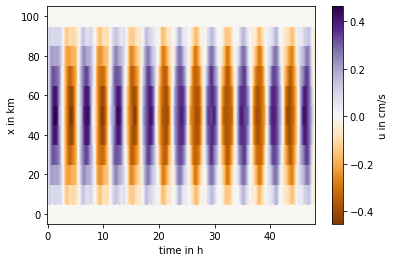

In [15]:
plt.pcolormesh(mesh_t_u, mesh_x_u,u_result*100,cmap='PuOr', shading='auto')
plt.xlabel('time in h')
plt.ylabel('x in km')
plt.colorbar(label='u in cm/s')

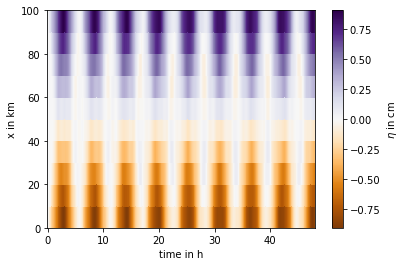

In [17]:
plt.pcolormesh(mesh_t_eta, mesh_x_eta,eta_result*100,cmap='PuOr', shading='auto')
plt.xlabel('time in h')
plt.ylabel('x in km')
plt.colorbar(label=r'$\eta$ in cm')